In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
from VAE import *
%matplotlib inline
from matplotlib import pyplot as plt

/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
batch_size = 32
learning_rate = 1e-3
epoch = 100
label_size = 10

In [4]:
def kld_eval(sess,input):
    return sess.run(vae.KLD,feed_dict={vae.X:input})

def likelihood_eval(sess,input):
    return sess.run(vae.likelihood,feed_dict={vae.X:input})

encoder
kld :  16.108728  likelihood:  -554.81384
loss in  0 epoch  1  batch :  570.92255
kld :  29.401682  likelihood:  -71.97171
loss in  1 epoch  1  batch :  101.37339
kld :  29.90696  likelihood:  -68.6073
loss in  2 epoch  1  batch :  98.51426
kld :  29.249332  likelihood:  -67.5192
loss in  3 epoch  1  batch :  96.76854
kld :  29.230713  likelihood:  -68.75726
loss in  4 epoch  1  batch :  97.987976
kld :  29.364418  likelihood:  -67.90033
loss in  5 epoch  1  batch :  97.26475
kld :  29.342628  likelihood:  -68.78362
loss in  6 epoch  1  batch :  98.12625
kld :  29.135288  likelihood:  -67.835236
loss in  7 epoch  1  batch :  96.97052
kld :  29.872837  likelihood:  -67.59184
loss in  8 epoch  1  batch :  97.464676
kld :  29.418812  likelihood:  -66.48473
loss in  9 epoch  1  batch :  95.90355
kld :  29.474453  likelihood:  -67.22862
loss in  10 epoch  1  batch :  96.70308
kld :  29.241394  likelihood:  -68.23231
loss in  11 epoch  1  batch :  97.4737
kld :  29.50692  likelihood:

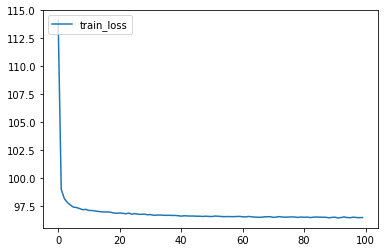

In [10]:
with tf.Session() as sess:
    
    vae = VAE(
        input_shape=list(mnist.train.images.shape[1:]),
        label_size=label_size,
        batch_size=batch_size,
        learning_rate=learning_rate,
        sess= sess
    )
    init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    sess.run(init_op)
    
    loss_history = []
    
    for i in range(epoch):
      loss_mean = 0
      for j in range(1000):
        #images,_ = mnist.train.next_batch(batch_size)
        images = mnist.train.images[:batch_size]
        _,loss,kld,likelihood = vae.train(images)
        #op,loss,kld,likelihood
        loss_mean+= loss
        if (j % 1000 == 1):
            print('kld : ',kld,' likelihood: ',likelihood)
            print('loss in ',i,'epoch ',j,' batch : ',loss)
      loss_mean /= 1000
      loss_history.append(loss_mean)
    
    
    plt.plot(loss_history)
    plt.legend(['train_loss'],loc='upper left')
    
    Z = np.random.normal(size=(batch_size,label_size))
    predict = vae.predict(Z)



original image:


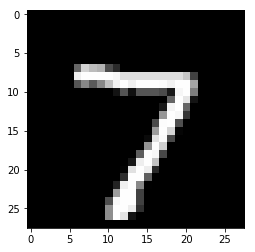

generated image


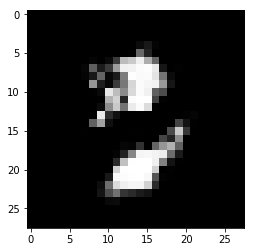

--------------------------
original image:


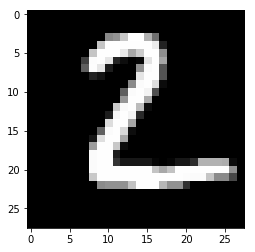

generated image


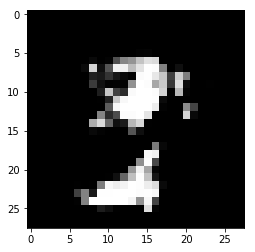

--------------------------
original image:


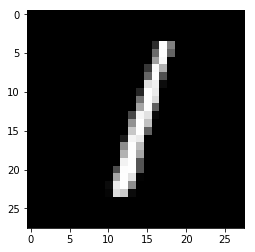

generated image


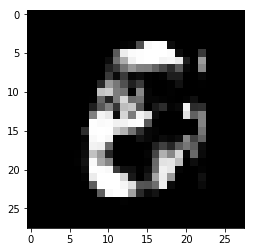

--------------------------
original image:


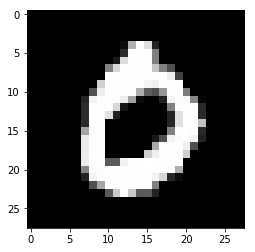

generated image


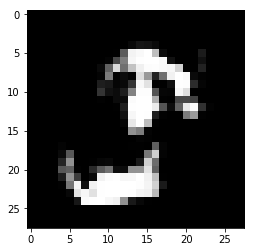

--------------------------
original image:


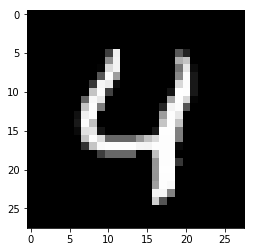

generated image


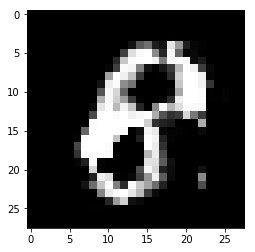

--------------------------
original image:


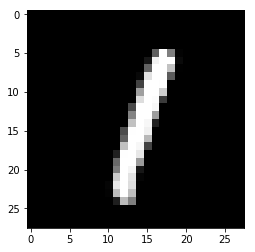

generated image


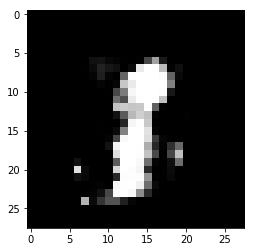

--------------------------
original image:


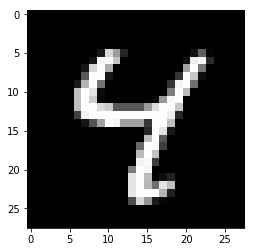

generated image


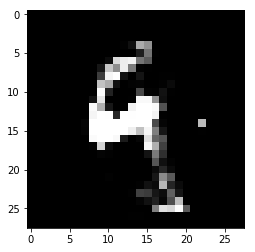

--------------------------
original image:


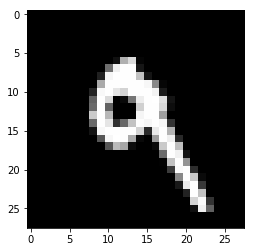

generated image


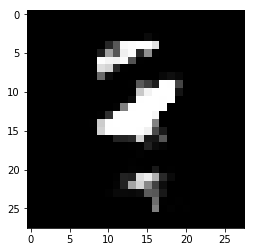

--------------------------
original image:


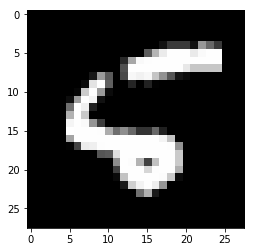

generated image


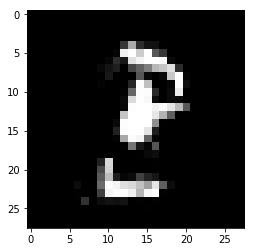

--------------------------
original image:


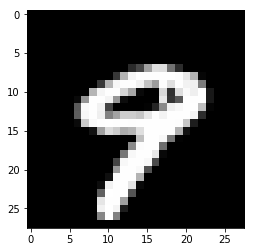

generated image


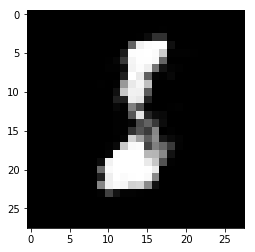

--------------------------
original image:


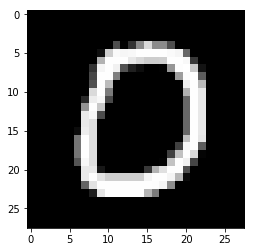

generated image


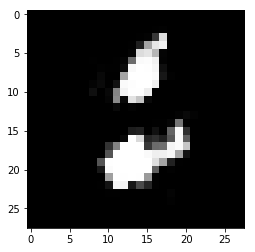

--------------------------
original image:


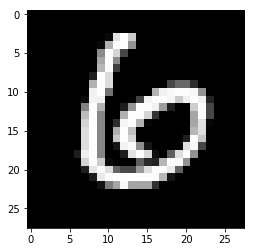

generated image


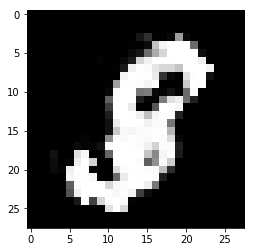

--------------------------
original image:


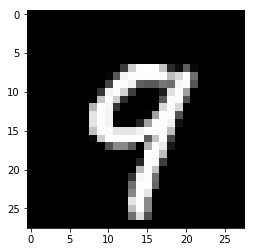

generated image


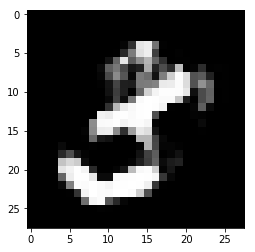

--------------------------
original image:


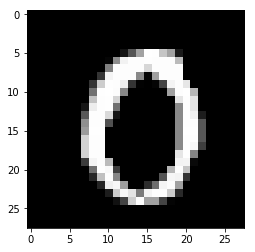

generated image


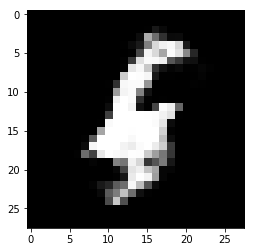

--------------------------
original image:


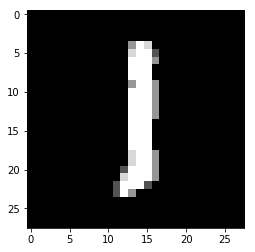

generated image


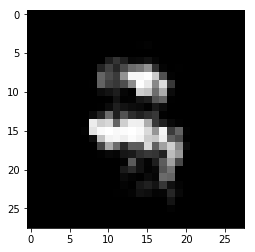

--------------------------
original image:


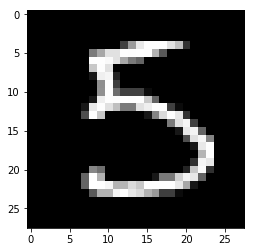

generated image


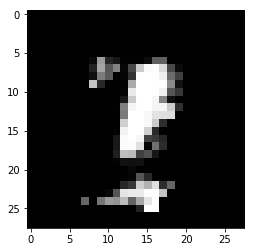

--------------------------
original image:


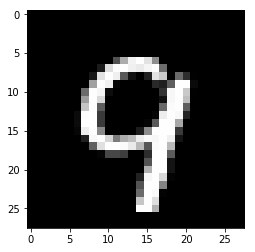

generated image


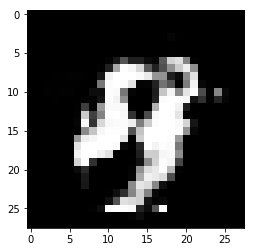

--------------------------
original image:


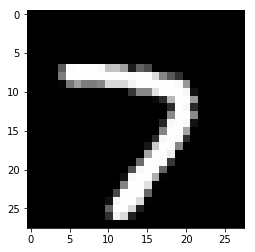

generated image


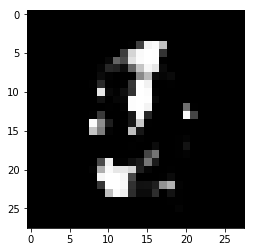

--------------------------
original image:


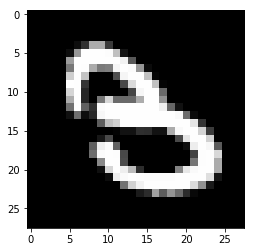

generated image


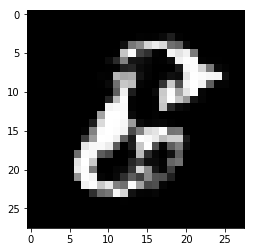

--------------------------
original image:


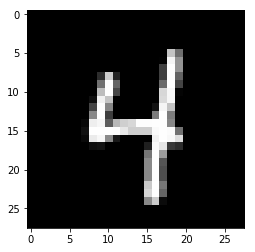

generated image


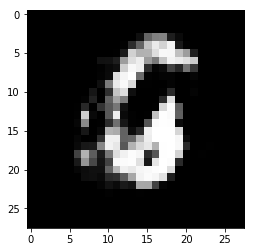

--------------------------
original image:


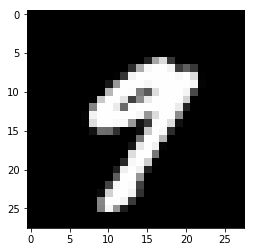

generated image


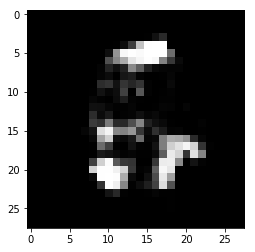

--------------------------
original image:


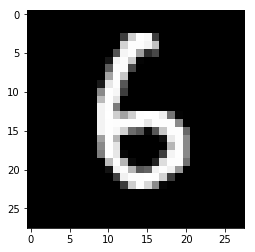

generated image


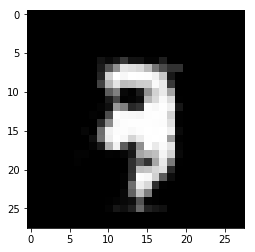

--------------------------
original image:


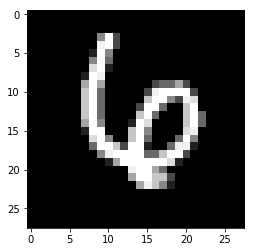

generated image


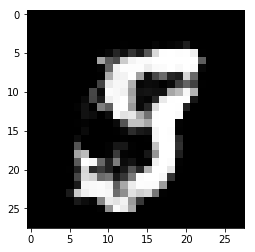

--------------------------
original image:


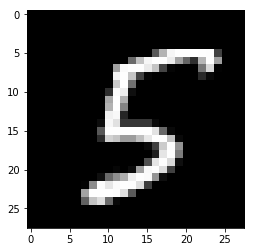

generated image


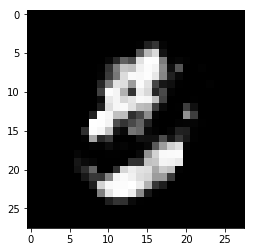

--------------------------
original image:


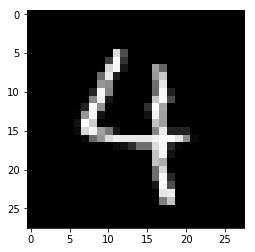

generated image


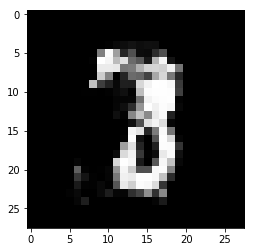

--------------------------
original image:


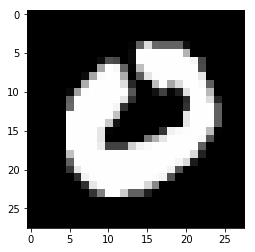

generated image


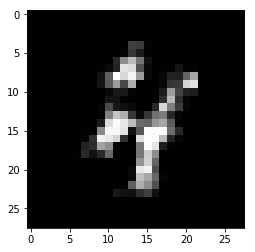

--------------------------
original image:


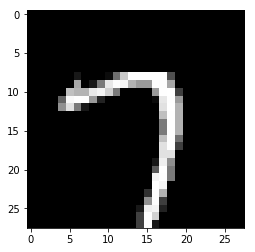

generated image


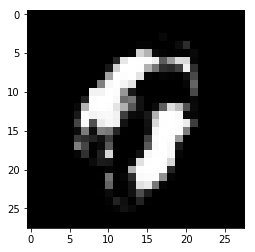

--------------------------
original image:


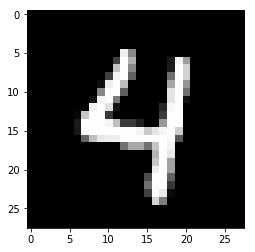

generated image


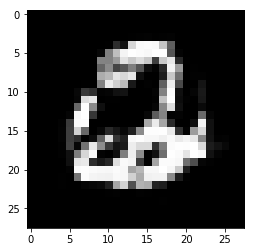

--------------------------
original image:


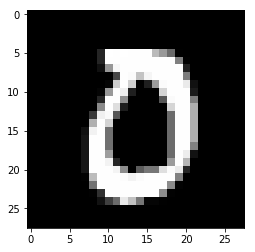

generated image


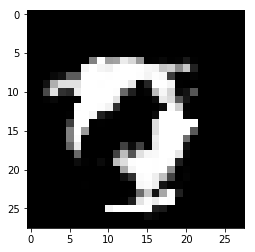

--------------------------
original image:


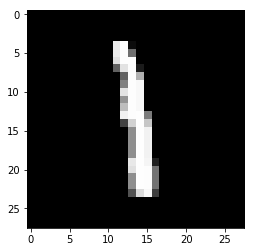

generated image


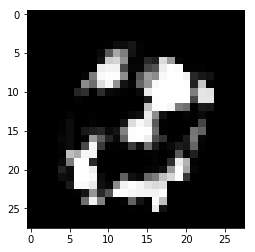

--------------------------
original image:


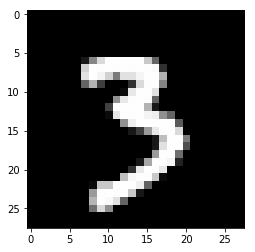

generated image


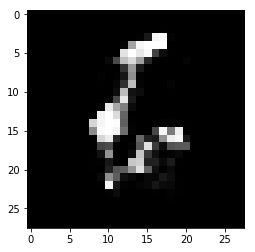

--------------------------
original image:


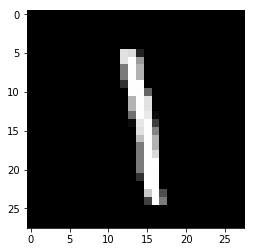

generated image


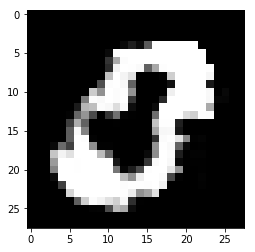

--------------------------


In [14]:
for i in range(batch_size):
    print('original image:')
    plt.imshow(mnist.test.images[i].reshape(28,28),cmap='Greys_r')
    plt.show()
    print('generated image')
    plt.imshow(predict[i].reshape(28,28),cmap = 'Greys_r')
    plt.show()
    print('--------------------------')

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.62352943 0.54509807 